In [2]:
# 1.导入库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']#win

In [3]:
# 2.导入数据
df = pd.read_csv('data/house_sales.csv')

In [4]:
# 3.数据概览
print('总记录数:',len(df))
print(('字段数量:',len(df.columns)))
df.info()

总记录数: 106118
('字段数量:', 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106118 entries, 0 to 106117
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   city        106118 non-null  object
 1   address     104452 non-null  object
 2   area        105324 non-null  object
 3   floor       104024 non-null  object
 4   name        105564 non-null  object
 5   price       105564 non-null  object
 6   province    106118 non-null  object
 7   rooms       104036 non-null  object
 8   toward      105240 non-null  object
 9   unit        105564 non-null  object
 10  year        57736 non-null   object
 11  origin_url  105564 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


In [5]:
# 4.数据清洗
#删除无用数据
df.drop(columns='origin_url',inplace=True)

In [6]:
#检查是否有缺失值
df.isna().sum()
#删除缺失值
df.dropna(inplace=True)
#检查是否有重复的
df.duplicated().sum()
#删除重复数据
df.drop_duplicates(inplace=True)
#面积类型转换
df['area'] = df['area'].str.replace('㎡','').astype(float)
#售价的数据类型转换
df['price'] = df['price'].str.replace('万','').astype(float)
#朝向的数据类型转换
df['toward'] = df['toward'].astype('category')
#单机的数据类型转换
df['unit'] = df['unit'].str.replace('元/㎡','').astype(float)
#建造年份的数据类型转换
df['year'] = df['year'].str.replace('年建','').astype(int)

In [7]:
#异常值处理
#房屋面积的异常值处理
df = df[(df['area']<600)&(df['area']>20)]
#房屋售价异常处理 IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
low_price = Q1 -1.5*IQR
high_price = Q3+1.5*IQR
df = df[(df['price']>low_price) & (df['price']<high_price)]

In [8]:
# 5.新数据特征构造
# 地区district
df['district'] = df ['address'].str.split('-').str[0]
# 楼层的类型floor_type
df['floor_type'] = df['floor'].str.split('（').str[0]
# 是否是直辖市
def fun2(str2):
    if str2 in ['北京','上海','天津','重庆']:
        return True
    else:
        return False
df['直辖市'] = df['city'].apply(lambda x: fun2(x))
# 卧室的数量bedrooms
df['bedrooms'] = df['rooms'].str.split('室').str[0].astype(int)
# 客厅的数量livingrooms
df['livingrooms'] = df['rooms'].str.extract(r'(\d+)厅').astype(int)
# 楼龄building_age
df['building_age'] = 2025 - df['year']
# 价格的分段price_label
df['price_labels'] = pd.cut( df['price'],bins=4,labels=['low','medium','high','amazing'])

Text(0.5, 1.0, '房屋特征热力图')

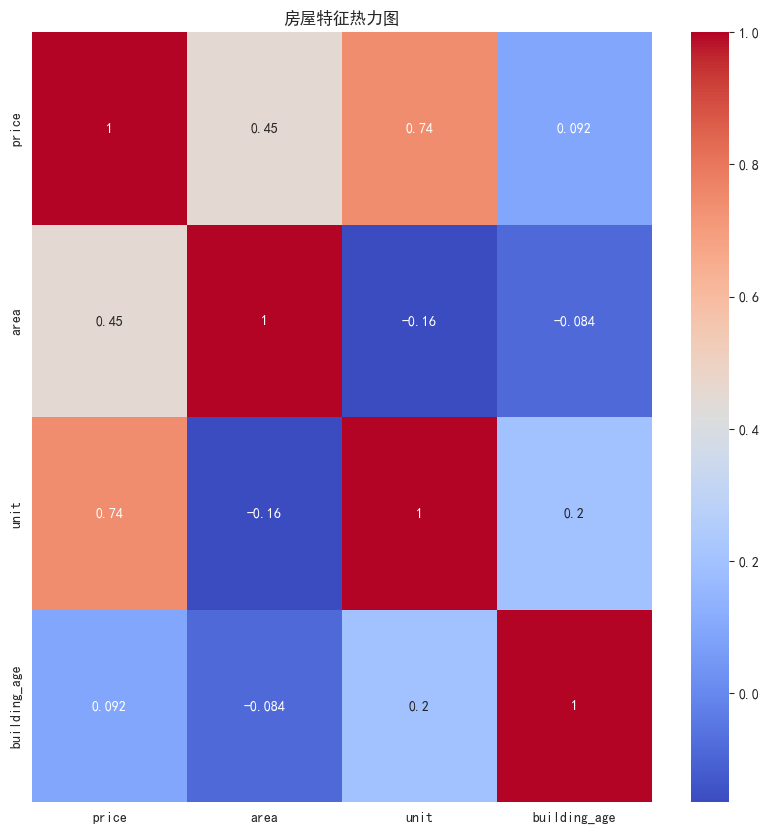

In [16]:
# 6.问题分析及可视化
# 选择数值型特征
a = df[['price','area','unit','building_age']].corr()#相关系数
a['price'].sort_values(ascending=False)[1:]
#相关性的热力图
plt.figure(figsize=(10,10))
sns.heatmap(a,cmap='coolwarm',annot=True)
plt.title('房屋特征热力图')

In [17]:
df.describe()

,area,price,unit,year,bedrooms,livingrooms,building_age
count,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000
mean,103.755810,117.208370,11610.131012,2013.072240,2.714444,1.848556,11.927760
std,33.995994,60.967675,5824.245273,6.019342,0.800768,0.407353,6.019342
min,21.000000,9.000000,1000.000000,1976.000000,0.000000,0.000000,2.000000
25%,85.005000,72.000000,7587.000000,2011.000000,2.000000,2.000000,8.000000
50%,100.000000,103.000000,10312.000000,2015.000000,3.000000,2.000000,10.000000
75%,123.000000,150.000000,14184.000000,2017.000000,3.000000,2.000000,14.000000
max,470.000000,306.000000,85288.000000,2023.000000,9.000000,12.000000,49.000000


(array([ 991., 4810., 6499., 4613., 3362., 2226., 1333., 1055.,  691.,
         555.]),
 array([  9. ,  38.7,  68.4,  98.1, 127.8, 157.5, 187.2, 216.9, 246.6,
        276.3, 306. ]),
 <BarContainer object of 10 artists>)

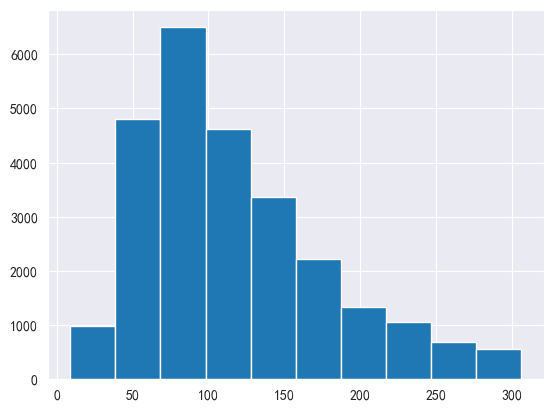

In [19]:
#房价分布直方图
plt.subplot(111)
plt.hist(df['price'],bins=10)

<Axes: xlabel='price', ylabel='Count'>

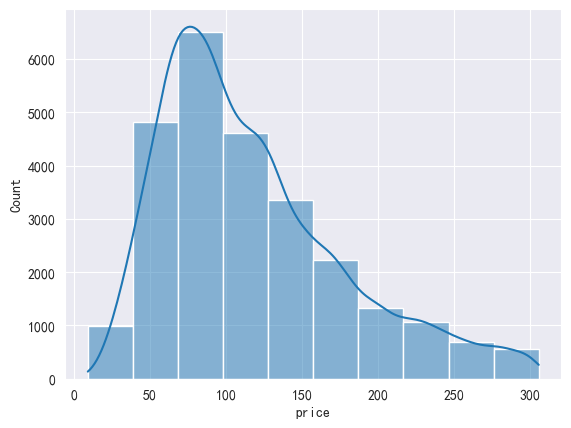

In [22]:
sns.histplot(data=df,x='price',bins = 10,kde=True)

In [24]:
df['toward'].value_counts()
df.groupby('toward').agg({
    'price':['mean','median'],
    'unit':'median',
    'building_age':'mean'
})

C:\Users\wys31\AppData\Local\Temp\ipykernel_20852\1372537260.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('toward').agg({


price            unit building_age
              mean median   median         mean
toward                                         
东北向     114.555333  100.0  12198.0    12.609524
东南向     115.542608  105.0  10864.0    10.951745
东向      110.158568   95.0  11421.0    12.761337
东西向      98.935099   82.0   9000.0    15.490066
北向       92.527907   75.5  11698.0    13.108527
南北向     119.472147  104.5  10000.0    12.073703
南向      114.555016  103.0  10759.0    11.551160
西北向     119.107594  105.0  12290.0    13.473684
西南向     139.711811  138.4  13333.0    13.452756
西向      102.662298   86.0  12528.0    13.385093

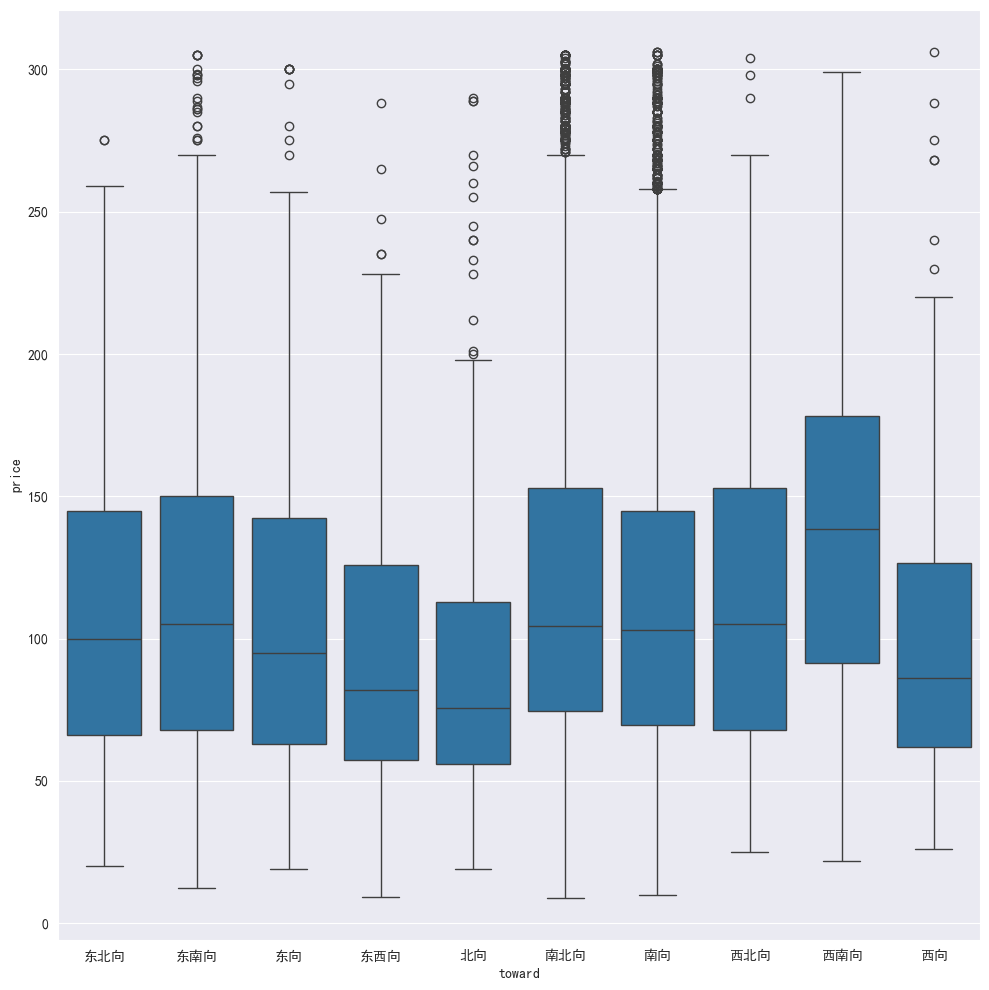

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x='toward',y='price',data=df)
plt.tight_layout()